In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [26]:
# read train 
train = pd.read_csv("./input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# read test 
test= pd.read_csv("./input/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

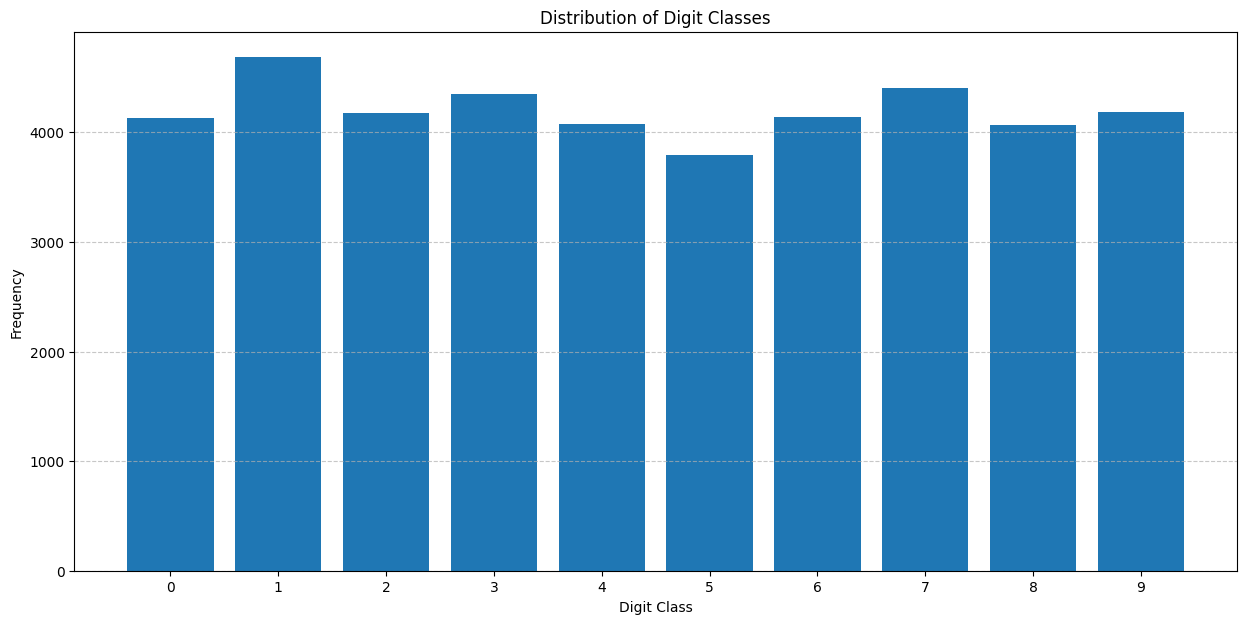

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [29]:
# visualize number of digits classes
Y_train.value_counts()

# Assuming Y_train.value_counts() has been previously defined and returns a Series
counts = Y_train.value_counts()

#sort the index
counts.sort_index(inplace=True)

# Plot the distribution of the labels
plt.figure(figsize=(15,7))
plt.bar(counts.index, counts.values)

plt.title('Distribution of Digit Classes')
plt.xlabel('Digit Class')
plt.ylabel('Frequency')
plt.xticks(range(len(counts.index)), counts.index)  # Ensure all labels are represented on the x-axis

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# visualize number of digits classes
Y_train.value_counts()


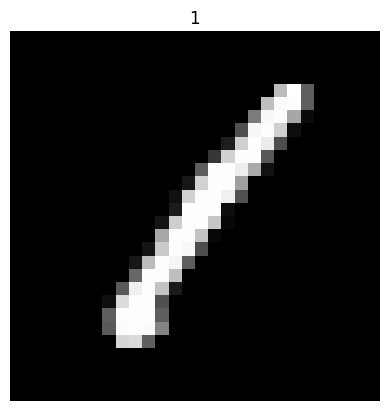

In [30]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

In [31]:
#Normalization, Reshape and Label Encoding
# Normalization
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)
x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [32]:
# Label Encoding
from keras.utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [33]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [34]:
# Importing necessary libraries
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [35]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [36]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [37]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [38]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [39]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 8s 46ms/step - loss: 1.1750 - accuracy: 0.6060 - val_loss: 0.2333 - val_accuracy: 0.9364
Epoch 2/10
151/151 [==============================] - 7s 45ms/step - loss: 0.4542 - accuracy: 0.8565 - val_loss: 0.1326 - val_accuracy: 0.9638
Epoch 3/10
151/151 [==============================] - 7s 45ms/step - loss: 0.3220 - accuracy: 0.8988 - val_loss: 0.0999 - val_accuracy: 0.9719
Epoch 4/10
151/151 [==============================] - 7s 45ms/step - loss: 0.2710 - accuracy: 0.9151 - val_loss: 0.0811 - val_accuracy: 0.9745
Epoch 5/10
151/151 [==============================] - 7s 45ms/step - loss: 0.2358 - accuracy: 0.9273 - val_loss: 0.0724 - val_accuracy: 0.9781
Epoch 6/10
151/151 [==============================] - 7s 45ms/step - loss: 0.2190 - accuracy: 0.9330 - val_loss: 0.0717 - val_accuracy: 0.9788
Epoch 7/10
151/151 [==============================] - 7s 45ms/step - loss: 0.1989 - accuracy: 0.9373 - val_loss: 0.0594 - val_accuracy: 0.9819

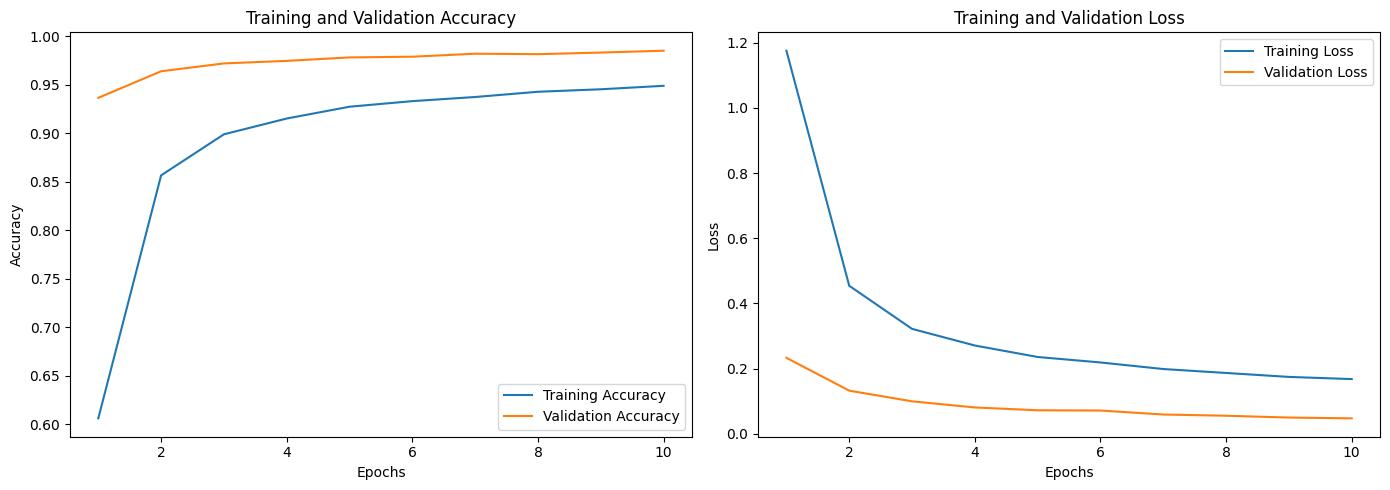

In [40]:
# Retrieve the history data from the history object
history_data = history.history

# List of epochs
epochs = range(1, len(history_data['accuracy']) + 1)

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_data['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_data['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, history_data['loss'], label='Training Loss')
plt.plot(epochs, history_data['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 73ms/step
The prediction for the digit in the picture is: 8


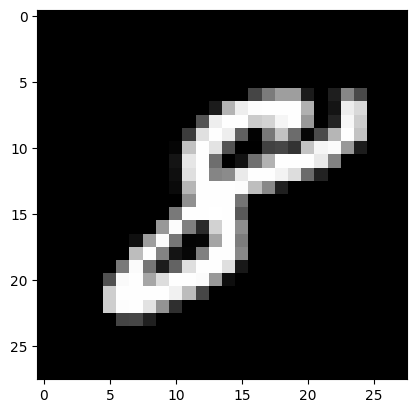

In [41]:
#give a random number and predict its value

# Select a random picture from the test set
random_index = np.random.randint(0, len(test))

# Reshape the picture to be in the right format for the model
img = test[random_index].reshape(1, 28, 28, 1)

# Predict the digit in the picture
prediction = model.predict(img)

# Plot the picture
plt.imshow(test[random_index].reshape(28, 28), cmap='gray')

# Print the prediction
print(f'The prediction for the digit in the picture is: {np.argmax(prediction)}')